 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [82]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [83]:
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_pd = pd.read_csv(whale_returns_csv,index_col="Date", parse_dates=True)


In [84]:
# Reading whale returns
whale_pd.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [85]:
# Count nulls
whale_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [86]:
# Drop nulls
whale_pd.dropna(inplace=True)
whale_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [87]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_pd = pd.read_csv(algo_returns_csv,index_col="Date", parse_dates=True)
algo_pd.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [88]:
# Count nulls
algo_pd.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [89]:
# Drop nulls
algo_pd.dropna(inplace=True)
algo_pd.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [90]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path("Resources/sp_tsx_history.csv")
sp_tsx_history_pd = pd.read_csv(sp_tsx_history_csv,index_col="Date", parse_dates=True)
sp_tsx_history_pd.head()

Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23
2012-10-03  $12,359.47
2012-10-04  $12,447.68
2012-10-05  $12,418.99

In [91]:
# Check Data Types
sp_tsx_history_pd.info()
sp_tsx_history_pd.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2012-10-01 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1818 non-null   object
dtypes: object(1)
memory usage: 28.4+ KB


Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23
2012-10-03  $12,359.47
2012-10-04  $12,447.68
2012-10-05  $12,418.99

In [92]:
# Fix Data Types
sp_tsx_history_pd["Close"] = sp_tsx_history_pd["Close"].str.replace("$", "")
sp_tsx_history_pd["Close"] = sp_tsx_history_pd["Close"].str.replace(",", "")
sp_tsx_history_pd["Close"] = sp_tsx_history_pd["Close"].astype("float")
sp_tsx_history_pd.head()

Close
Date                
2012-10-01  12370.19
2012-10-02  12391.23
2012-10-03  12359.47
2012-10-04  12447.68
2012-10-05  12418.99

In [93]:
# Calculate Daily Returns
sp_tsx_history_pd["Close"] = sp_tsx_history_pd["Close"].astype('float')
sp_tsx_history_pd.info()
sp_tsx_history_pd["Close"] = sp_tsx_history_pd["Close"].pct_change()
sp_tsx_history_pd.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2012-10-01 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1818 non-null   float64
dtypes: float64(1)
memory usage: 28.4 KB


Close
Date                
2012-10-01       NaN
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305

In [94]:
# Drop nulls
sp_tsx_history_pd.dropna(inplace=True)
sp_tsx_history_pd.isnull().sum()

Close    0
dtype: int64

In [95]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history_pd.columns = ["TSX CLOSE"]
sp_tsx_history_pd.head()

TSX CLOSE
Date                 
2012-10-02   0.001701
2012-10-03  -0.002563
2012-10-04   0.007137
2012-10-05  -0.002305
2012-10-09  -0.011709

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [96]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
total_returns = pd.concat([whale_pd,algo_pd,sp_tsx_history_pd], axis="columns", join="inner")
total_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2  TSX CLOSE  
Date                             
2015-03-03 -0.000949  -0.008530  
2015-03-04  0.002416  -0.003371  
2015-03-05  0.004323   0.001344  
2015-03-06 -0.011460  -0.009972  
2015-03-09  0.001303  -0.006555

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

Text(0.5, 1.0, 'Daily returns of all the funds and TSX')

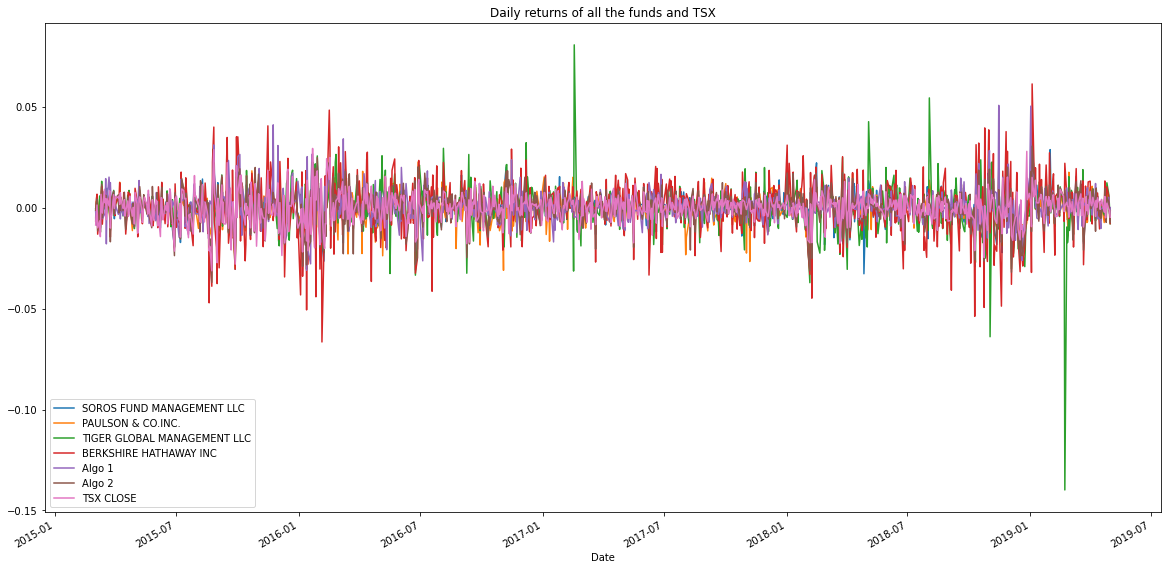

In [138]:
# Plot daily returns of all portfolios
total_returns.plot(figsize=(20, 10))
plt.title("Daily returns of all the funds and TSX")



#### Calculate and Plot cumulative returns.

Text(0.5, 1.0, 'cumulative returns of all the funds and TSX')

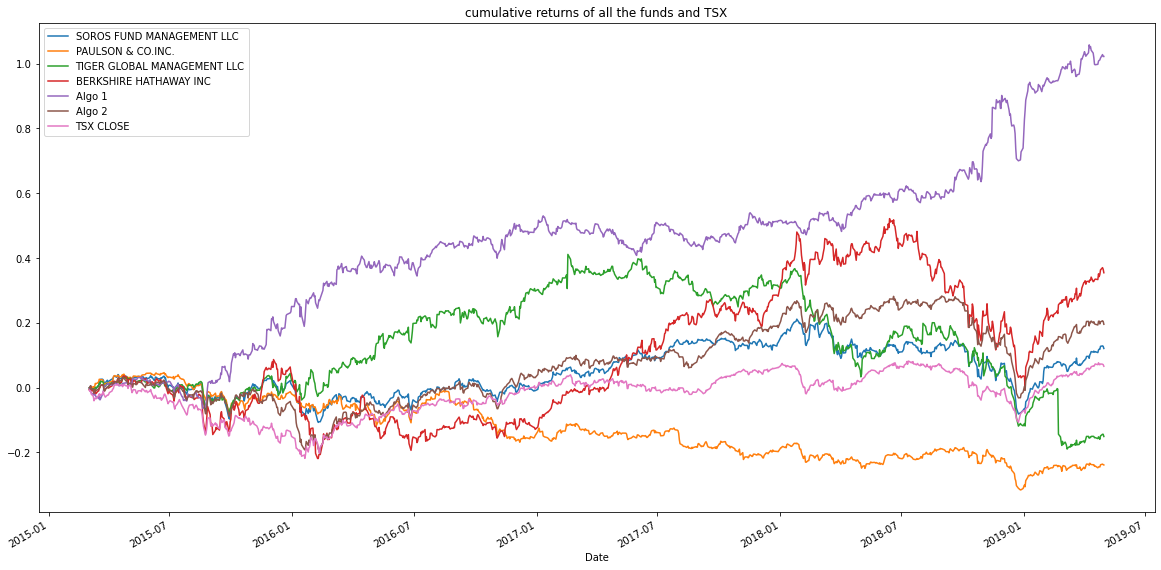

In [139]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+total_returns).cumprod() -1
cumulative_returns.head()
cumulative_returns.plot(figsize=(20,10))
# Plot cumulative returns
plt.title("cumulative returns of all the funds and TSX")



---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


Text(0.5, 1.0, 'cumulative returns in form of a box presentation of all the funds and TSX')

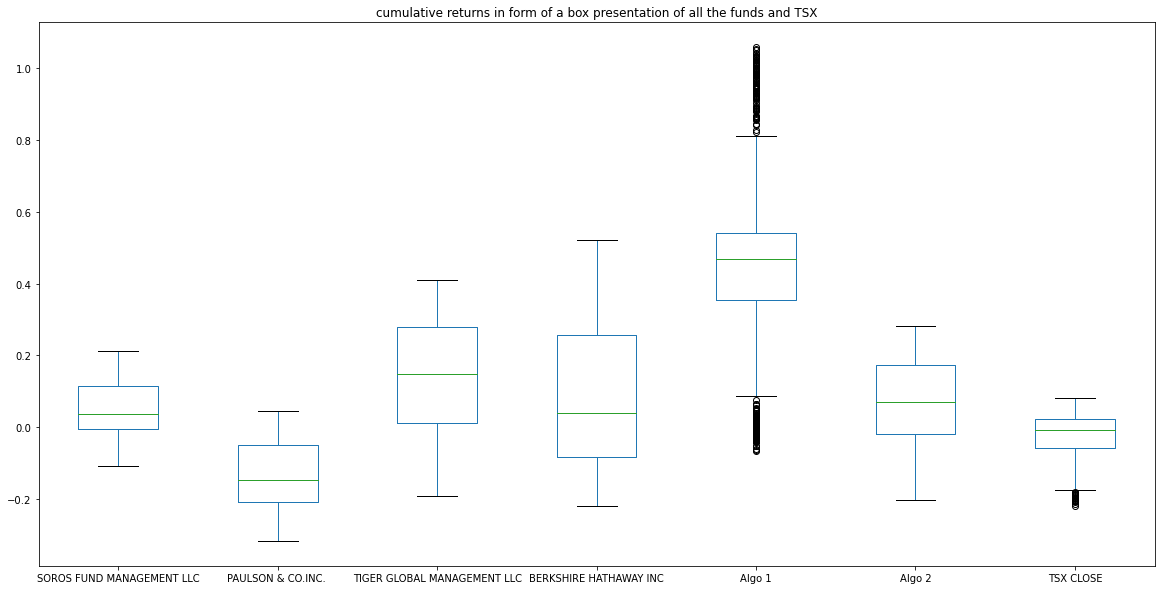

In [140]:
# Box plot to visually show risk
cumulative_returns.plot.box(figsize=(20,10))

plt.title("cumulative returns in form of a box presentation of all the funds and TSX")



### Calculate Standard Deviations

In [100]:
# Calculate the daily standard deviations of all portfolios
cumulative_std = cumulative_returns.std()
print(cumulative_std)

SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.090735
TIGER GLOBAL MANAGEMENT LLC    0.148722
BERKSHIRE HATHAWAY INC         0.196871
Algo 1                         0.258839
Algo 2                         0.116607
TSX CLOSE                      0.064354
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [101]:
# Calculate  the daily standard deviation of S&P TSX 60
print(cumulative_std["TSX CLOSE"])
# Determine which portfolios are riskier than the S&P TSX 60
cumulative_risk = cumulative_std[cumulative_std > cumulative_std["TSX CLOSE"]]
print(cumulative_risk)

0.06435360632809135
SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.090735
TIGER GLOBAL MANAGEMENT LLC    0.148722
BERKSHIRE HATHAWAY INC         0.196871
Algo 1                         0.258839
Algo 2                         0.116607
dtype: float64


### Calculate the Annualized Standard Deviation

In [102]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = cumulative_std * np.sqrt(252)
annual_std


SOROS FUND MANAGEMENT LLC      1.115525
PAULSON & CO.INC.              1.440370
TIGER GLOBAL MANAGEMENT LLC    2.360896
BERKSHIRE HATHAWAY INC         3.125227
Algo 1                         4.108944
Algo 2                         1.851072
TSX CLOSE                      1.021582
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                        NaN                 NaN   
2015-03-05                        NaN                 NaN   
2015-03-06                        NaN                 NaN   
2015-03-09                        NaN                 NaN   
...                               ...                 ...   
2019-04-25                   0.015754            0.006179   
2019-04-26                   0.015466            0.006044   
2019-04-29                   0.015122            0.005417   
2019-04-30                   0.014305            0.004771   
2019-05-01                   0.013619            0.004658   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                          NaN             

Text(0.5, 1.0, 'Rolling standard devation over 21 days window for all the funds and TSX')

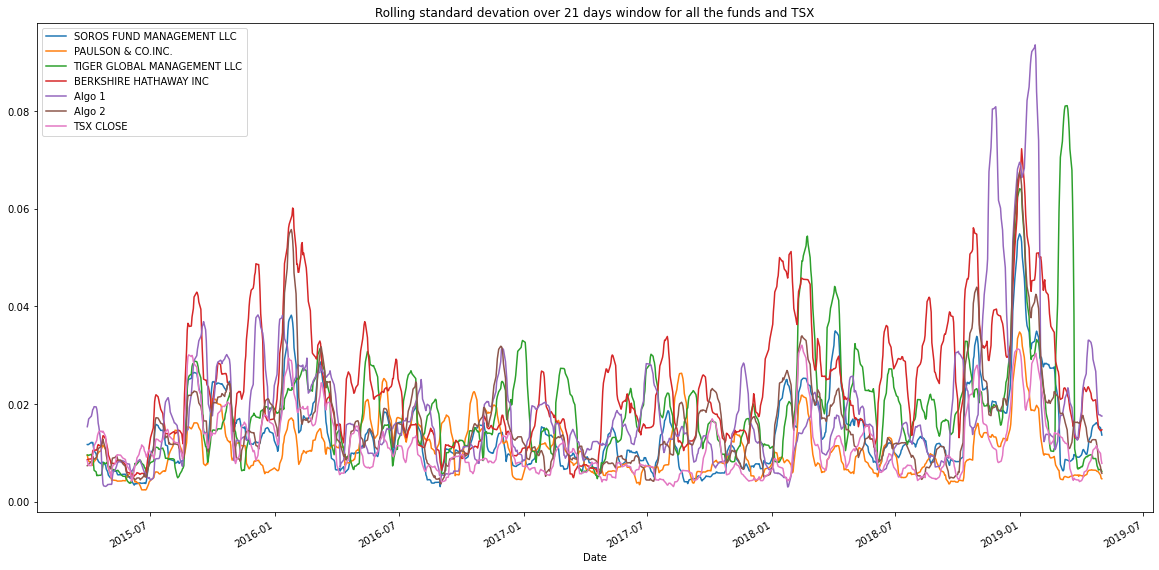

In [141]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
std_rolling_21 = cumulative_returns.rolling(window=21).std()
print(std_rolling_21)
# Plot the rolling standard deviation
std_rolling_21.plot(figsize =(20,10))
plt.title("Rolling standard devation over 21 days window for all the funds and TSX")



### Calculate and plot the correlation

Text(0.5, 1.0, 'Heat map of correlation for all the funds and TSX')

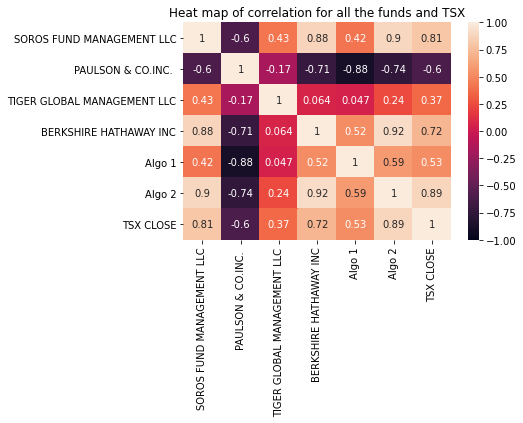

In [142]:
# Calculate the correlation
import seaborn as sns

correlation = cumulative_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
correlation
plt.title("Heat map of correlation for all the funds and TSX")



### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

0.009123234501570559
0.004141386647430959
2.20294


Text(0.5, 1.0, 'Beta Trend based on corelation of cumulative return')

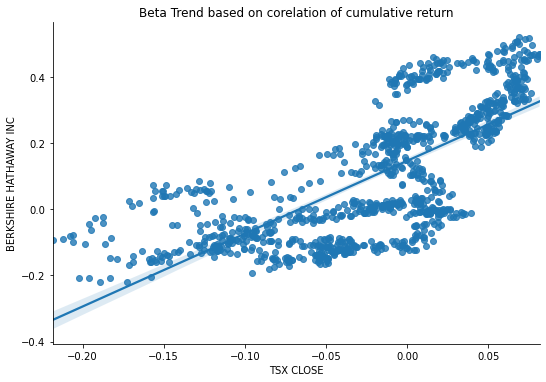

In [105]:
# Calculate covariance of a single portfolio
covariance = cumulative_returns["BERKSHIRE HATHAWAY INC"].cov(cumulative_returns["TSX CLOSE"])
print(covariance)
# Calculate variance of S&P TSX
variance = cumulative_returns["TSX CLOSE"].var()
print(variance)

# Computing beta
bkc_beta = (covariance/variance).round(5)
print(bkc_beta)
# Plot beta trend
import seaborn as sns
sns.lmplot(x='TSX CLOSE', y='BERKSHIRE HATHAWAY INC', data=cumulative_returns, aspect=1.5, fit_reg=True)
plt.title("Beta Trend based on corelation of cumulative return")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

Text(0.5, 1.0, 'Standard deviation over 21 days rolling window using EWM function for all the funds and TSX')

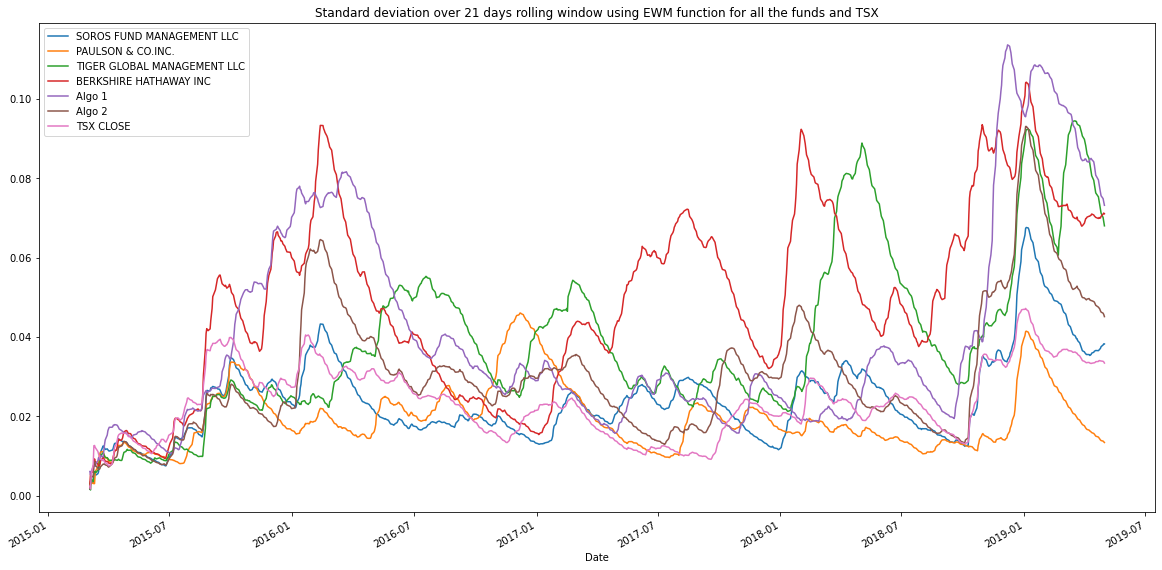

In [143]:
# Use `ewm` to calculate the rolling window
cumulative_returns.ewm(halflife=21).std().plot(figsize= (20,10))
plt.title("Standard deviation over 21 days rolling window using EWM function for all the funds and TSX")



---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [107]:
# Annualized Sharpe Ratios
sharpe_ratios = (cumulative_returns.mean() * 252) / (cumulative_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -22.381050
TSX CLOSE                      -5.027228
BERKSHIRE HATHAWAY INC          8.214824
Algo 2                          9.942376
SOROS FUND MANAGEMENT LLC      11.402242
TIGER GLOBAL MANAGEMENT LLC    15.001554
Algo 1                         27.120044
dtype: float64

Text(0.5, 1.0, 'Sharpe ratios of all the funds and TSX')

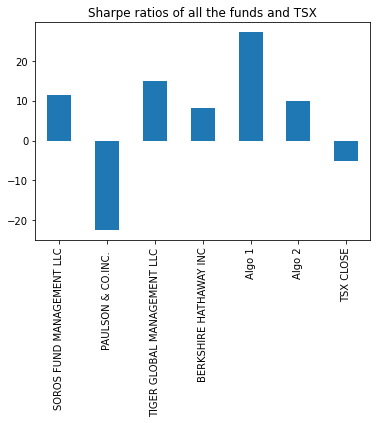

In [144]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()
plt.title("Sharpe ratios of all the funds and TSX")



### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [109]:
# Reading data from 1st stock
shopify_returns_csv = Path("Resources/shop_historical.csv")

shopify_pd = pd.read_csv(shopify_returns_csv, index_col = "Date", parse_dates = True)
shopify_pd = shopify_pd.drop(columns=["Symbol"])
shopify_pd.head()

Close
Date              
2018-01-02  132.06
2018-01-03  135.15
2018-01-04  137.46
2018-01-05  137.26
2018-01-08  139.51

In [110]:
# Reading data from 2nd stock
otex_returns_csv = Path("Resources/otex_historical.csv")

otex_pd = pd.read_csv(otex_returns_csv, index_col = "Date", parse_dates = True)
otex_pd = otex_pd.drop(columns=["Symbol"])
otex_pd.head()

Close
Date             
2018-01-02  43.58
2018-01-03  43.07
2018-01-04  42.91
2018-01-05  42.57
2018-01-08  42.16

In [111]:
# Reading data from 3rd stock
l_returns_csv = Path("Resources/l_historical.csv")

l_pd = pd.read_csv(l_returns_csv, index_col = "Date", parse_dates = True)
l_pd = l_pd.drop(columns=["Symbol"])
l_pd.head()

Close
Date             
2018-01-02  57.99
2018-01-03  57.41
2018-01-04  57.42
2018-01-05  57.42
2018-01-08  56.86

In [112]:
# Combine all stocks in a single DataFrame
combined_pd =pd.concat([shopify_pd, otex_pd, l_pd], axis ="columns", join ="inner")
combined_pd.head(5)

Close  Close  Close
Date                            
2018-01-02  132.06  43.58  57.99
2018-01-03  135.15  43.07  57.41
2018-01-04  137.46  42.91  57.42
2018-01-05  137.26  42.57  57.42
2018-01-08  139.51  42.16  56.86

In [113]:
# Reset Date index
combined_pd.sort_index(inplace=True)

In [114]:
# Reorganize portfolio data by having a column per symbol
combined_pd.columns = ["Shopify", "Otex", "Loblaws"]
combined_pd.head(5)

Shopify   Otex  Loblaws
Date                               
2018-01-02   132.06  43.58    57.99
2018-01-03   135.15  43.07    57.41
2018-01-04   137.46  42.91    57.42
2018-01-05   137.26  42.57    57.42
2018-01-08   139.51  42.16    56.86

In [115]:
# Calculate daily return
combined_pd = combined_pd.pct_change()

combined_pd.head()


# Drop NAs
combined_pd.dropna(inplace=True)
combined_pd.isnull().sum()
# Display sample data
combined_pd.head()

Shopify      Otex   Loblaws
Date                                    
2018-01-03  0.023398 -0.011703 -0.010002
2018-01-04  0.017092 -0.003715  0.000174
2018-01-05 -0.001455 -0.007924  0.000000
2018-01-08  0.016392 -0.009631 -0.009753
2018-01-09 -0.011254 -0.000712  0.008969

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [116]:
# Set weights
weights = [1/3, 1/3, 1/3]



# Calculate portfolio return
weighted_returns = combined_pd.dot(weights)
weighted_returns.columns = ["Weighted Returns"]

# Display sample data
print(weighted_returns.columns)
print(weighted_returns.head())

['Weighted Returns']
Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [117]:
# Join your returns DataFrame to the original returns DataFrame
yet_combined_pd = pd.concat([total_returns, weighted_returns], axis="columns", join="inner")
yet_combined_pd.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2018-01-03                   0.004658            0.000027   
2018-01-04                  -0.000914            0.004196   
2018-01-05                   0.004072            0.000823   
2018-01-08                   0.004473           -0.003739   
2018-01-09                  -0.001028            0.000872   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2018-01-03                     0.001979                0.005676 -0.000890   
2018-01-04                     0.010743                0.004065 -0.000914   
2018-01-05                     0.000737                0.022023 -0.003839   
2018-01-08                     0.005085                0.003435  0.001653   
2018-01-09                     0.001789                0.000708 -0.001004   

              Algo 2  TSX CLOSE         0  
Date                                       
2018-01-03  0.008175   0.003774  0.000565  
2018-01-04  0.004294   0.002528  0.004517  
2018-01-05  0.006405  -0.003869 -0.003126  
2018-01-08  0.000658  -0.001944 -0.000997  
2018-01-09 -0.002091   0.000097 -0.000999

In [118]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
yet_combined_pd.dropna(inplace=True)
print(yet_combined_pd.head(10))

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2018-01-03                   0.004658            0.000027   
2018-01-04                  -0.000914            0.004196   
2018-01-05                   0.004072            0.000823   
2018-01-08                   0.004473           -0.003739   
2018-01-09                  -0.001028            0.000872   
2018-01-10                  -0.002753           -0.002290   
2018-01-11                   0.010541            0.011773   
2018-01-12                   0.002590            0.002418   
2018-01-16                  -0.005126           -0.005553   
2018-01-17                   0.008249           -0.002485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2018-01-03                     0.001979                0.005676 -0.000890   
2018-01-04                     0.010

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [119]:
#cumulative returns

cumulative_combined_return = (1+yet_combined_pd).cumprod() -1
cumulative_combined_return.columns = ("SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "TSX CLOSE", "WR_Folio")
print(cumulative_combined_return)

#cumulative standard deviation for combined returns
yet_cumulative_std = cumulative_combined_return.std()
print(yet_cumulative_std)

# Calculate the annualized `std`

yet_cumulative_annual_std = yet_cumulative_std * np.sqrt(252)
print(yet_cumulative_annual_std)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.  \
Date                                                       
2018-01-03                   0.004658           0.000027   
2018-01-04                   0.003739           0.004224   
2018-01-05                   0.007826           0.005050   
2018-01-08                   0.012333           0.001293   
2018-01-09                   0.011293           0.002166   
...                               ...                ...   
2019-04-25                  -0.032216          -0.072963   
2019-04-26                  -0.024329          -0.064470   
2019-04-29                  -0.023105          -0.061926   
2019-04-30                  -0.024370          -0.064000   
2019-05-01                  -0.030074          -0.065256   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2018-01-03                     0.001979                0.005676 -

### Calculate and plot rolling `std` with 21-day window

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.  \
Date                                                       
2018-01-03                        NaN                NaN   
2018-01-04                        NaN                NaN   
2018-01-05                        NaN                NaN   
2018-01-08                        NaN                NaN   
2018-01-09                        NaN                NaN   
...                               ...                ...   
2019-04-25                   0.013635           0.007589   
2019-04-26                   0.013386           0.007423   
2019-04-29                   0.013088           0.006654   
2019-04-30                   0.012382           0.005859   
2019-05-01                   0.011788           0.005720   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2018-01-03                          NaN                     NaN  

Text(0.5, 1.0, 'Standard deviation over 21 days rolling window for all funds')

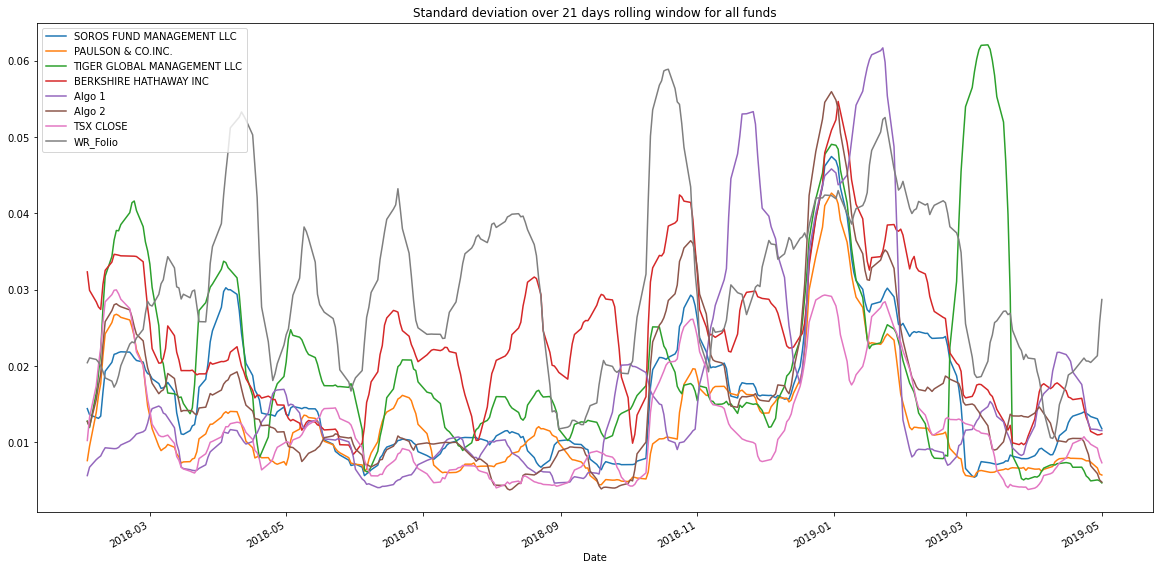

In [145]:
# Calculate rolling standard deviation
yet_rolling_21_std = cumulative_combined_return.rolling(window=21).std()
print(yet_rolling_21_std)
# Plot rolling standard deviation
yet_rolling_21_std.plot(figsize =(20,10))
plt.title("Standard deviation over 21 days rolling window for all funds")


### Calculate and plot the correlation

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.  \
SOROS FUND MANAGEMENT LLC                     1.000000           0.801991   
PAULSON & CO.INC.                             0.801991           1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.702475           0.773930   
BERKSHIRE HATHAWAY INC                        0.836624           0.555235   
Algo 1                                       -0.617272          -0.588286   
Algo 2                                        0.872696           0.812773   
TSX CLOSE                                     0.658362           0.582632   
WR_Folio                                     -0.290562          -0.397579   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.702475   
PAULSON & CO.INC.                               0.773930   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.539299   
Algo 1                                         -0.887703   
Algo 2                                          0.614170   
TSX CLOSE                                       0.258681   
WR_Folio                                       -0.774784   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.836624 -0.617272  0.872696   
PAULSON & CO.INC.                          0.555235 -0.588286  0.812773   
TIGER GLOBAL MANAGEMENT LLC                0.539299 -0.887703  0.614170   
BERKSHIRE HATHAWAY INC                     1.000000 -0.609367  0.875799   
Algo 1                                    -0.609367  1.000000 -0.598549   
Algo 2                                     0.875799 -0.598549  1.000000   
TSX CLOSE                                  0.714434 -0.158172  0.815509   
WR_Folio                                  -0.190660  0.840200 -0.191997   

                             TSX CLOSE  WR_Folio  
SOROS FUND MANAGEMENT LLC     0.658362 -0.290562  
PAULSON & CO.INC.             0.582632 -0.397579  
TIGER GLOBAL MANAGEMENT LLC   0.258681 -0.774784  
BERKSHIRE HATHAWAY INC        0.714434 -0.190660  
Algo 1                       -0.158172  0.840200  
Algo 2                        0.815509 -0.191997  
TSX CLOSE                     1.000000  0.265092  
WR_Folio                      0.265092  1.000000

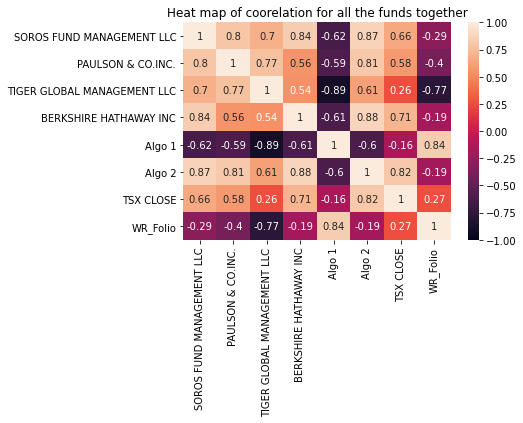

In [147]:
# Calculate and plot the correlation
import seaborn as sns

yet_correlation = cumulative_combined_return.corr()
# Display de correlation matrix
sns.heatmap(yet_correlation, vmin=-1, vmax=1, annot=True)

plt.title("Heat map of coorelation for all the funds together")

yet_correlation

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

Date
2018-01-03        NaN
2018-01-04        NaN
2018-01-05        NaN
2018-01-08        NaN
2018-01-09        NaN
               ...   
2019-04-25    2.67424
2019-04-26    2.58774
2019-04-29    2.53303
2019-04-30    2.58714
2019-05-01    2.64863
Length: 328, dtype: float64


Text(0.5, 1.0, 'Beta Trend based on corelation of cumulative return')

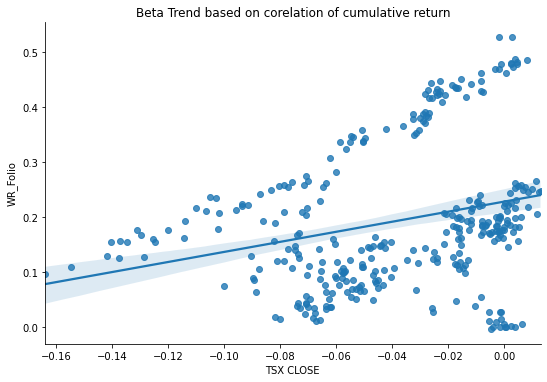

In [131]:
# Calculate and plot Beta
#std_rolling_21 = cumulative_returns.rolling(window=21).std()


roll_covariance = cumulative_combined_return["WR_Folio"].rolling(window=60).cov(cumulative_combined_return["TSX CLOSE"])
#print(roll_covariance)

# Calculate variance of S&P TSX
roll_variance = cumulative_combined_return["TSX CLOSE"].rolling(window=60).var()
#print(variance)

# Computing beta
roll_beta = (roll_covariance/roll_variance).round(5)
print(roll_beta)


# Plot beta trend
import seaborn as sns
sns.lmplot(x='TSX CLOSE', y='WR_Folio', data=cumulative_combined_return, aspect=1.5, fit_reg=True)
plt.title("Beta Trend based on corelation of cumulative return")


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [124]:
# Calculate Annualzied Sharpe Ratios
combined_sharpe_ratios = (cumulative_combined_return.mean() * 252) / (cumulative_combined_return.std() * np.sqrt(252))
combined_sharpe_ratios.sort_values()


TIGER GLOBAL MANAGEMENT LLC   -25.363578
PAULSON & CO.INC.             -22.606655
TSX CLOSE                     -16.592780
SOROS FUND MANAGEMENT LLC     -15.153337
Algo 2                         -1.455706
BERKSHIRE HATHAWAY INC          0.449602
Algo 1                         16.226821
WR_Folio                       24.066113
dtype: float64

Text(0.5, 1.0, 'Sharpe Ratios of all the portfolios together')

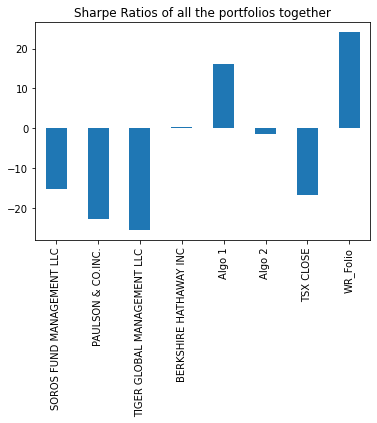

In [137]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratios.plot.bar()
plt.title("Sharpe Ratios of all the portfolios together")



### How does your portfolio do?

Write your answer here!

In [148]:
### To understand the comparative performance of our portfolio we will use the results from sharpe ratio. 
### what this provides is a measurement of the portfolio’s outperformance per unit of the portfolio’s volatility. All else being equal, portfolios with higher excess returns or lower volatility will show higher Sharpe Ratios, and vice-versa.
### Sharpe Ratios above 1.00 are generally considered “good”, as this would suggest that the portfolio is offering excess returns relative to its volatility.
### We are comparing the sharpe ratios of 7 different portfolios and TSX close together, within this group Algo 1 and our own made up portfolio of 3 different stocks(WR_Folio) is performing well.
### WR_Folio is performing better than any other portfolios in the given time frame. This means that their performance in terms of cumulative return out-weighs the volatality of the portfolio within the given timeframe. In terms, risk to gain/return ratio is better.